In [16]:
import requests, readline, sys, json
import numpy
import networkx as nx
import matplotlib as mpl
%matplotlib inline
%config InlineBacked.figure_format = 'svg'
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
import seaborn
from graphviz import Digraph

from query import *
from contexts import *
from myconcepts import *
from concepts import Definition, Context
from datetime import datetime


In [17]:
nameCtxt = makeContext(getQuery(proc_nameQ),'pid','name')
nameCtxt

Response: 200


{}

In [18]:
proc_execQ = "g.V().hasLabel('Subject').has('subjectType','SUBJECT_PROCESS').as('x').values('cid').as('pid').select('x').both().has('eventType','EVENT_EXECUTE').values('cmdLine').as('cmd').select('pid','cmd').dedup()"
execCtxt = makeContext(getQuery(proc_execQ),'pid','cmd')
execCtxt


Response: 200


{'18190': {'sleep 5'},
 '13250': {'/bin/sh -c /usr/libexec/atrun', '/usr/libexec/atrun'},
 '9546': {'ifconfig -a'},
 '5018': {'bounce -z -n defer -t unix -u'},
 '18191': {'bash -c netstat -an > stats.txt'},
 '18192': {'netstat -an'},
 '9547': {'sleep 5'},
 '9548': {'bash -c sleep 100', 'sleep 100'},
 '18193': {'sleep 5'},
 '18194': {'bash -c sleep 200', 'sleep 200'},
 '13252': {'trivial-rewrite -n rewrite -t unix -u'},
 '9551': {'sleep 5'},
 '13253': {'local -t unix'},
 '9552': {'bash -c rm -rf ipinfo.txt', 'rm -rf ipinfo.txt'},
 '5019': {'bounce -z -n defer -t unix -u'},
 '9553': {'sleep 5'},
 '18199': {'/bin/sh -c /usr/libexec/atrun', '/usr/libexec/atrun'},
 '9554': {'bash -c sleep 34', 'sleep 34'},
 '9555': {'sleep 5'},
 '9556': {'bash -c netstat /ano', 'netstat /ano'},
 '18200': {'sleep 5'},
 '13255': {'bounce -z -n defer -t unix -u'},
 '13254': {'local -t unix'},
 '18201': {'bash -c rm stats.txt', 'rm stats.txt'},
 '18202': {'sleep 5'},
 '9557': {'sleep 5'},
 '18203': {'bash -c sl

In [19]:
execCtxt['1097']

KeyError: '1097'

In [20]:
netflowCtxt = makeContext(getQuery(proc_netflowQ),'pid','dest')
netflowCtxt

Response: 200


{'10634': {'128.55.12.167'},
 '10635': {'10.0.6.31', '128.55.12.81', '129.55.12.81'},
 '16780': {'10.0.6.31', '128.55.12.81'},
 '18957': {'129.55.12.81'},
 '5071': {'128.55.12.81'},
 '5087': {'10.0.6.31'},
 '539': {'10.0.6.253'},
 '559': {'10.0.50.253'},
 '579': {'129.55.12.253'},
 '599': {'128.55.12.253'},
 '6213': {'128.55.12.10'},
 '7612': {'129.55.12.81'},
 '920': {'127.0.0.1'},
 '926': {'10.0.6.31', '128.55.12.167', '128.55.12.81', '129.55.12.81'},
 '928': {'128.55.12.167'},
 '968': {'10.0.4.1',
  '10.0.6.31',
  '128.55.12.167',
  '128.55.12.252',
  '128.55.12.81',
  '129.55.12.81'}}

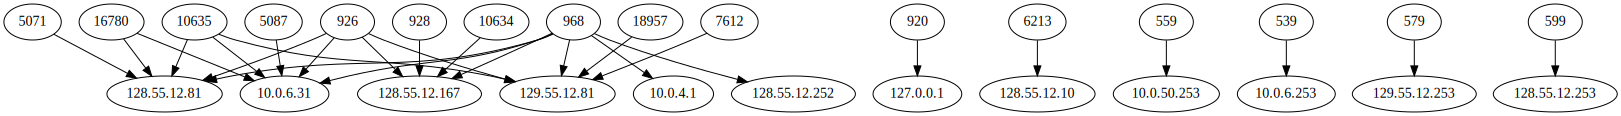

In [21]:
dot = Digraph(comment='netflowCtxt')
for v in netflowCtxt:
    dot.node(v)
    for w in netflowCtxt[v]:
        dot.edge(v,w)
dot

In [13]:
execCtxt['926']

KeyError: '926'

In [14]:
eventCtxt = makeContext(getQuery(proc_eventQ),'pid','type')
eventCtxt

Response: 200


{'1181': {'EVENT_CHANGE_PRINCIPAL',
  'EVENT_CLOSE',
  'EVENT_CONNECT',
  'EVENT_CREATE_OBJECT',
  'EVENT_FNCTL',
  'EVENT_FORK',
  'EVENT_LSEEK',
  'EVENT_MMAP',
  'EVENT_MODIFY_PROCESS',
  'EVENT_MPROTECT',
  'EVENT_OPEN',
  'EVENT_READ',
  'EVENT_RECVFROM',
  'EVENT_SENDTO'},
 '13249': {'EVENT_CLOSE',
  'EVENT_CREATE_OBJECT',
  'EVENT_EXIT',
  'EVENT_FNCTL',
  'EVENT_FORK',
  'EVENT_READ'},
 '18190': {'EVENT_CLOSE',
  'EVENT_EXECUTE',
  'EVENT_EXIT',
  'EVENT_FORK',
  'EVENT_LSEEK',
  'EVENT_MMAP',
  'EVENT_OPEN',
  'EVENT_READ'},
 '13250': {'EVENT_CHANGE_PRINCIPAL',
  'EVENT_CLOSE',
  'EVENT_CONNECT',
  'EVENT_CREATE_OBJECT',
  'EVENT_EXECUTE',
  'EVENT_EXIT',
  'EVENT_FORK',
  'EVENT_LOGIN',
  'EVENT_LSEEK',
  'EVENT_MMAP',
  'EVENT_MODIFY_PROCESS',
  'EVENT_OPEN',
  'EVENT_READ',
  'EVENT_SENDTO'},
 '9546': {'EVENT_CLOSE',
  'EVENT_CREATE_OBJECT',
  'EVENT_EXECUTE',
  'EVENT_EXIT',
  'EVENT_FORK',
  'EVENT_LSEEK',
  'EVENT_MMAP',
  'EVENT_OPEN',
  'EVENT_READ',
  'EVENT_WRITE'},


In [15]:
def mkCtxt(context):
    d = Definition()
    for label in context.keys():
        d.add_object(label,context[label])
    c = Context(*d)
    return c

In [16]:
c = mkCtxt(eventCtxt)

In [18]:
c.tofile('eventCtxt.csv',frmat='csv')

In [19]:
c.lattice

KeyboardInterrupt: 

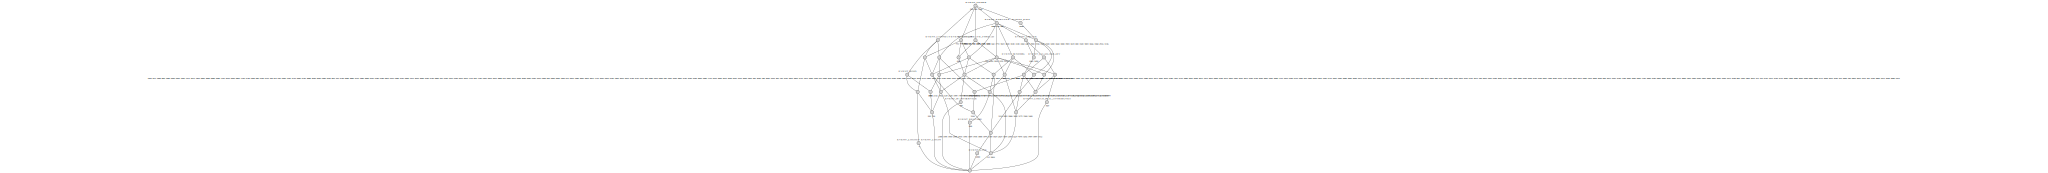

In [9]:
dot1 = mkCtxt(eventCtxt).lattice.graphviz()
dot1.render('test-output/eventCtxt', view=True)
dot1

In [11]:
name_eventQ = "g.V().hasLabel('Subject').has('subjectType','SUBJECT_PROCESS').as('x').values('cmdLine').as('name').select('x').in().hasLabel('Event').as('y').values('eventType').as('type').select('name','type').dedup()"
nameEventCtxt = makeContext(getQuery(name_eventQ),'name','type')
dot4 = mkCtxt(nameEventCtxt).lattice.graphviz()
dot4.render('test-output/eventName', view=True)
dot4

In [14]:
eventNameCtxt = combineContexts(eventCtxt,nameCtxt)
#dot2 = mkCtxt(context).lattice.graphviz()
#dot2.render('test-output/eventName', view=True)
#dot2

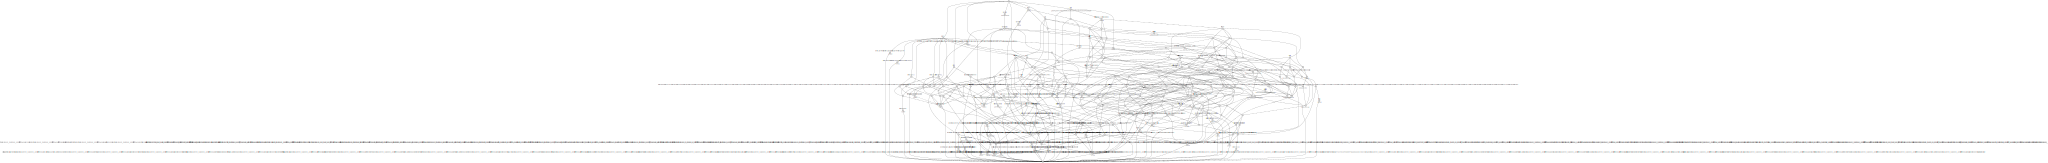

In [12]:
fileCtxt = makeContext(getQuery(proc_fileQ),'pid','file')
prefFileCtxt = {k : allprefixes(fileCtxt[k]) for k in fileCtxt.keys()}
ctx = combineContexts(prefFileCtxt,context)
#dot = mkCtxt(prefFileCtxt).lattice.graphviz()


In [20]:
file_eventQ = "g.V().hasLabel('FileObject').as('z').values('path').as('file').select('z').in().hasLabel('Event').as('y').values('eventType').as('type').select('file','type').dedup()"
fileEventCtxt = makeContext(getQuery(file_eventQ),'file','type')
mkCtxt(fileEventCtxt).lattice.graphviz()


KeyboardInterrupt: 

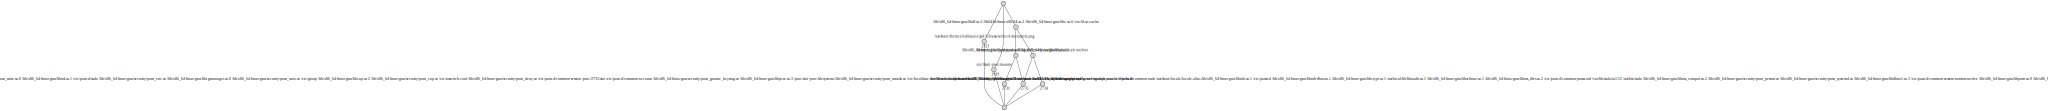

In [15]:
procFileCtxt = makeContext(getQuery(proc_fileQ),'pid','file')
dot = mkCtxt(procFileCtxt).lattice.graphviz()
dot.render('test-output/procFile', view=True)
dot

In [30]:
proc_writes_fileQ = "g.V().hasLabel('Subject').has('subjectType','SUBJECT_PROCESS').as('x').values('cid').as('pid').select('x').in().hasLabel('Event').as('y').has('eventType','EVENT_WRITE').select('y').out().hasLabel('FileObject').as('z').values('path').as('file').select('pid','file').dedup()"
getQuery(proc_writes_fileQ)
procWritesFileCtxt = makeContext(getQuery(proc_writes_fileQ),'pid','file')
mkCtxt(procWritesFileCtxt).lattice.graphviz()
#dot.render('test-output/procWritesFile', view=True)


Error: <stdin>: syntax error in line 28 near ''


CalledProcessError: Command '['dot', '-Tsvg']' returned non-zero exit status 1.

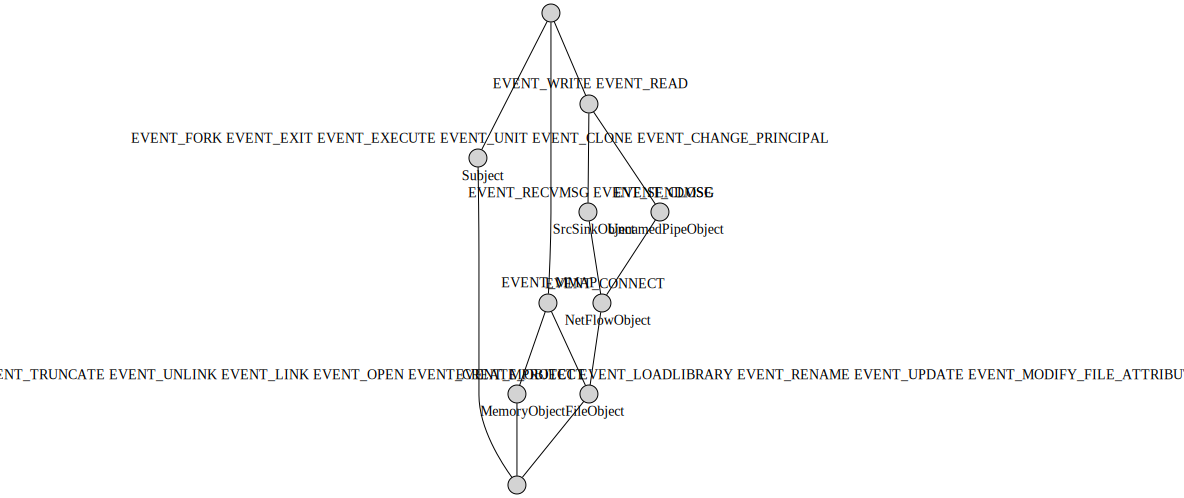

In [31]:
event_type_objectQ = "g.V().hasLabel('Event').as('y').values('eventType').as('type').select('y').out('predicateObject','predicateObject2').label().as('object').select('type','object').dedup()"
#getQuery(event_type_objectQ)
eventObjectCtxt = makeContext(getQuery(event_type_objectQ),'object','type')
dot = mkCtxt(eventObjectCtxt).lattice.graphviz()
#dot.render('test-output/eventObject', view=True)
dot

In [33]:
files = getQuery("g.V().hasLabel('FileObject').values('path').dedup().order()")
counter = 0
allFileCtxt = {}
for k in files:
    allFileCtxt['o'+k] = prefixes(k)
mkCtxt(allFileCtxt).lattice.graphviz()



KeyboardInterrupt: 

In [5]:
minTimeQ = "g.V().has('timestampNanos').values('timestampNanos').min()"
maxTimeQ = "g.V().has('timestampNanos').values('timestampNanos').max()"
def mkDate(t): 
    return datetime.fromtimestamp(int(t)/1000000000)
(mkDate(getQuery(minTimeQ)[0]),mkDate(getQuery(maxTimeQ)[0]))

Response: 200
Response: 200


(datetime.datetime(2017, 5, 8, 17, 27, 1, 59060),
 datetime.datetime(2017, 5, 10, 22, 43, 21, 952831))

In [6]:
proc_eventTimeQ = "g.V().hasLabel('Subject').has('subjectType','SUBJECT_PROCESS').as('x').values('cid').as('pid').select('x').in().hasLabel('Event').as('y').values('timestampNanos').as('time').select('pid','time').dedup()"
def secondsApprox(dt):
    return datetime(dt.year,dt.month,dt.day,dt.hour,dt.minute,dt.second)
procTime = [{'pid':etq['pid'], 'time':str(secondsApprox(mkDate(etq['time'])))} for etq in getQuery(proc_eventTimeQ)]
procTimeCtxt = makeContext(procTime,'pid','time')
mkCtxt(procTimeCtxt).lattice.graphviz()


Response: 200


NameError: name 'mkCtxt' is not defined

In [4]:
context = eventCtxt
concepts = findAllConceptsWithMinSupp(context,0.05*len(context))
concepts

{frozenset(),
 frozenset({'EVENT_OTHER'}),
 frozenset({'EVENT_EXECUTE', 'EVENT_OTHER'}),
 frozenset({'EVENT_EXECUTE', 'EVENT_OTHER', 'EVENT_UPDATE'}),
 frozenset({'EVENT_EXIT', 'EVENT_OTHER'}),
 frozenset({'EVENT_EXECUTE', 'EVENT_EXIT', 'EVENT_OTHER'}),
 frozenset({'EVENT_CONNECT', 'EVENT_EXECUTE', 'EVENT_OTHER'}),
 frozenset({'EVENT_EXECUTE',
            'EVENT_EXIT',
            'EVENT_LOADLIBRARY',
            'EVENT_OTHER',
            'EVENT_UPDATE'}),
 frozenset({'EVENT_CONNECT',
            'EVENT_EXECUTE',
            'EVENT_EXIT',
            'EVENT_LOADLIBRARY',
            'EVENT_OTHER',
            'EVENT_UPDATE'}),
 frozenset({'EVENT_CREATE_THREAD', 'EVENT_EXECUTE', 'EVENT_OTHER'}),
 frozenset({'EVENT_EXECUTE', 'EVENT_OTHER', 'EVENT_SENDMSG'}),
 frozenset({'EVENT_EXECUTE', 'EVENT_EXIT', 'EVENT_OTHER', 'EVENT_SENDMSG'}),
 frozenset({'EVENT_CREATE_THREAD',
            'EVENT_EXECUTE',
            'EVENT_EXIT',
            'EVENT_LOADLIBRARY',
            'EVENT_OTHER',
     

In [5]:
edges(concepts)

{(frozenset(), frozenset({'EVENT_OTHER'})),
 (frozenset({'EVENT_OTHER'}),
  frozenset({'EVENT_CREATE_THREAD', 'EVENT_OTHER'})),
 (frozenset({'EVENT_OTHER'}), frozenset({'EVENT_EXECUTE', 'EVENT_OTHER'})),
 (frozenset({'EVENT_OTHER'}), frozenset({'EVENT_EXIT', 'EVENT_OTHER'})),
 (frozenset({'EVENT_OTHER'}), frozenset({'EVENT_ACCEPT', 'EVENT_OTHER'})),
 (frozenset({'EVENT_OTHER'}), frozenset({'EVENT_CONNECT', 'EVENT_OTHER'})),
 (frozenset({'EVENT_EXECUTE', 'EVENT_OTHER'}),
  frozenset({'EVENT_EXECUTE', 'EVENT_OTHER', 'EVENT_UPDATE'})),
 (frozenset({'EVENT_EXECUTE', 'EVENT_OTHER'}),
  frozenset({'EVENT_CREATE_THREAD', 'EVENT_EXECUTE', 'EVENT_OTHER'})),
 (frozenset({'EVENT_EXECUTE', 'EVENT_OTHER'}),
  frozenset({'EVENT_CONNECT', 'EVENT_EXECUTE', 'EVENT_OTHER'})),
 (frozenset({'EVENT_EXECUTE', 'EVENT_OTHER'}),
  frozenset({'EVENT_EXECUTE', 'EVENT_OTHER', 'EVENT_SENDMSG'})),
 (frozenset({'EVENT_EXECUTE', 'EVENT_OTHER'}),
  frozenset({'EVENT_EXECUTE', 'EVENT_EXIT', 'EVENT_OTHER'})),
 (frozense

In [6]:
getSupports(eventCtxt,concepts)

{frozenset(): 540,
 frozenset({'EVENT_OTHER'}): 540,
 frozenset({'EVENT_EXECUTE', 'EVENT_OTHER'}): 525,
 frozenset({'EVENT_EXECUTE', 'EVENT_OTHER', 'EVENT_UPDATE'}): 465,
 frozenset({'EVENT_EXIT', 'EVENT_OTHER'}): 508,
 frozenset({'EVENT_EXECUTE', 'EVENT_EXIT', 'EVENT_OTHER'}): 507,
 frozenset({'EVENT_CONNECT', 'EVENT_EXECUTE', 'EVENT_OTHER'}): 30,
 frozenset({'EVENT_EXECUTE',
            'EVENT_EXIT',
            'EVENT_LOADLIBRARY',
            'EVENT_OTHER',
            'EVENT_UPDATE'}): 459,
 frozenset({'EVENT_CONNECT',
            'EVENT_EXECUTE',
            'EVENT_EXIT',
            'EVENT_LOADLIBRARY',
            'EVENT_OTHER',
            'EVENT_UPDATE'}): 27,
 frozenset({'EVENT_CREATE_THREAD', 'EVENT_EXECUTE', 'EVENT_OTHER'}): 66,
 frozenset({'EVENT_EXECUTE', 'EVENT_OTHER', 'EVENT_SENDMSG'}): 74,
 frozenset({'EVENT_EXECUTE',
            'EVENT_EXIT',
            'EVENT_OTHER',
            'EVENT_SENDMSG'}): 72,
 frozenset({'EVENT_CREATE_THREAD',
            'EVENT_EXECUTE',


In [7]:

getScaledSupports(context,concepts)

{frozenset(): 1.0,
 frozenset({'EVENT_OTHER'}): 1.0,
 frozenset({'EVENT_EXECUTE', 'EVENT_OTHER'}): 0.9722222222222222,
 frozenset({'EVENT_EXECUTE',
            'EVENT_OTHER',
            'EVENT_UPDATE'}): 0.8611111111111112,
 frozenset({'EVENT_EXIT', 'EVENT_OTHER'}): 0.9407407407407408,
 frozenset({'EVENT_EXECUTE', 'EVENT_EXIT', 'EVENT_OTHER'}): 0.9388888888888889,
 frozenset({'EVENT_CONNECT',
            'EVENT_EXECUTE',
            'EVENT_OTHER'}): 0.05555555555555555,
 frozenset({'EVENT_EXECUTE',
            'EVENT_EXIT',
            'EVENT_LOADLIBRARY',
            'EVENT_OTHER',
            'EVENT_UPDATE'}): 0.85,
 frozenset({'EVENT_CONNECT',
            'EVENT_EXECUTE',
            'EVENT_EXIT',
            'EVENT_LOADLIBRARY',
            'EVENT_OTHER',
            'EVENT_UPDATE'}): 0.05,
 frozenset({'EVENT_CREATE_THREAD',
            'EVENT_EXECUTE',
            'EVENT_OTHER'}): 0.12222222222222222,
 frozenset({'EVENT_EXECUTE',
            'EVENT_OTHER',
            'EVENT_SEND

In [13]:
rules = findImpRules(context,concepts,0.95)

printRules(rules)

set() implies {'EVENT_OTHER'} [100.0%]
{'EVENT_OTHER', 'EVENT_EXECUTE', 'EVENT_UPDATE'} implies {'EVENT_LOADLIBRARY'} [99.56989247311829%]
{'EVENT_OTHER'} implies {'EVENT_EXECUTE'} [97.22222222222221%]
{'EVENT_OTHER', 'EVENT_EXECUTE'} implies {'EVENT_EXIT'} [96.57142857142857%]


In [14]:
def violations(s,rules):
    ent = 0
    for e in rules.keys():
        if e[0] <= s and not(e[1] <= s):
            ent = ent - numpy.log2(1-rules[e])
    return ent
violations({'EVENT_MMAP','EVENT_READ'},rules)

/home/jcheney/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log2


inf

In [18]:

vios = allViolations(context,rules)
def snd(x): return x[1]
sorted(vios.items(),key=snd,reverse=True)[0:10]

[('1064', 7.8610869059954025),
 ('3456', 7.8610869059954025),
 ('4', 5.1699250014423122),
 ('512', 5.1699250014423122),
 ('520', 5.1699250014423122),
 ('1760', 5.1699250014423122),
 ('1156', 5.1699250014423122),
 ('2936', 5.1699250014423122),
 ('688', 5.1699250014423122),
 ('404', 5.1699250014423122)]

TODO: Find 100% confidence rules, and infrequent combinations, as follows.  Consider all pairs of concepts X, Y.  Compute Z = (X U Y)'', the closure of the union of X and Y.  If Z - X U Y is nonempty and has large support, generate a 100% confidence rule X U Y -> Z.  (In principle could do this for all subsets of concepts but could be expensive.)  

To find infrequent combinations, look for X and Y such that Z = (X U Y)'' has small/no support.  Then X # Y is an infrequent combination rule (i.e. X U Y -> false)

In [12]:

exRules = exactRules(context,concepts)
printRules(exRules)

{'EVENT_OTHER', 'EVENT_EXECUTE', 'EVENT_CONNECT', 'EVENT_UPDATE'} implies {'EVENT_LOADLIBRARY', 'EVENT_EXIT'} [100.0%]
{'EVENT_OTHER', 'EVENT_CONNECT', 'EVENT_EXIT'} implies {'EVENT_EXECUTE', 'EVENT_LOADLIBRARY', 'EVENT_UPDATE'} [100.0%]
{'EVENT_OTHER', 'EVENT_EXECUTE', 'EVENT_CREATE_THREAD', 'EVENT_UPDATE'} implies {'EVENT_LOADLIBRARY'} [100.0%]
{'EVENT_OTHER', 'EVENT_CREATE_THREAD', 'EVENT_EXIT'} implies {'EVENT_EXECUTE'} [100.0%]
set() implies {'EVENT_OTHER'} [100.0%]
{'EVENT_OTHER', 'EVENT_EXECUTE', 'EVENT_SENDMSG', 'EVENT_UPDATE'} implies {'EVENT_LOADLIBRARY', 'EVENT_EXIT'} [100.0%]


In [23]:
def disjointRuleImplied(r1,r2):
    (x1,y1) = r1
    (x2,y2) = r2
    return (x1 <= x2 and y1 <= y2) or (x1 <= y2 and y1 <= x2)
def disjointRuleRedundant(rules,r):
    for rule in rules:
        if disjointRuleImplied(rule,r):
            return True
    return False
disjointRuleImplied(({'a'},{'d'}),({'a','b'},{'c','d'}))


True

In [24]:
def updateRules(rules,r):
    return {rule for rule in rules if not disjointRuleImplied(r,rule)} | {r}
def disjointRules(context,concepts): 
    rules = set()
    for x in concepts:
        for y in concepts:
            if not(disjointRuleRedundant(rules,(x,y))):
                z = getConcept(context,x|y)
                if not(z in concepts):
                    rules = updateRules(rules,(x,y))
    return rules


drules = disjointRules(context,concepts)
drules

{(frozenset({'EVENT_EXECUTE', 'EVENT_OTHER', 'EVENT_UPDATE'}),
  frozenset({'EVENT_EXECUTE', 'EVENT_OTHER', 'winlogon.exe'})),
 (frozenset({'"C:\\Users\\steve\\Documents\\Mozilla Firefox\\firefox.exe" 90',
             'EVENT_EXECUTE',
             'EVENT_EXIT',
             'EVENT_LOADLIBRARY',
             'EVENT_OTHER',
             'EVENT_UPDATE'}),
  frozenset({'"C:\\Program Files\\Common Files\\Microsoft Shared\\OfficeSoftwareProtectionPlatform\\OSPPSVC.EXE"',
             'EVENT_EXECUTE',
             'EVENT_EXIT',
             'EVENT_OTHER'})),
 (frozenset({'"C:\\Users\\steve\\Documents\\Mozilla Firefox\\firefox.exe" http://www.hbo.com',
             'EVENT_EXECUTE',
             'EVENT_EXIT',
             'EVENT_LOADLIBRARY',
             'EVENT_OTHER',
             'EVENT_UPDATE'}),
  frozenset({'"C:\\Users\\steve\\Documents\\Mozilla Firefox\\firefox.exe" http://www.dentalplans.gov',
             'EVENT_EXECUTE',
             'EVENT_EXIT',
             'EVENT_LOADLIBRARY',
  

In [25]:
def getDisjRuleScaledSupports(context,rules):
    newRules = {}
    n = len(context) 
    for rule in rules:
        concept = rule[0]|rule[1]
        newRules[rule] = getSupport(context,concept)/n
    return newRules
drules = getDisjRuleScaledSupports(context,drules)

In [26]:

def printDisjRules(rules): 
    for rule in rules.keys():
        print(str(set(rule[0])) + " is disjoint from " + str(set(rule[1])) + "[" + str(rules[rule]*100)+ "]")
printDisjRules({rule:drules[rule] for rule in drules if drules[rule] < 0.01 })

{'EVENT_CREATE_THREAD', 'EVENT_OTHER'} is disjoint from {'EVENT_EXECUTE', '"C:\\Users\\steve\\Documents\\Mozilla Firefox\\firefox.exe" http://www.tourism.gov.pk', 'EVENT_LOADLIBRARY', 'EVENT_UPDATE', 'EVENT_OTHER', 'EVENT_EXIT'}[0.7407407407407408]
{'EVENT_EXECUTE', 'EVENT_LOADLIBRARY', 'EVENT_UPDATE', 'EVENT_OTHER', '"C:\\Users\\steve\\Documents\\Mozilla Firefox\\firefox.exe" http://www.uitp.com', 'EVENT_EXIT'} is disjoint from {'EVENT_CONNECT', 'EVENT_OTHER'}[0.5555555555555556]
{'EVENT_EXECUTE', 'EVENT_LOADLIBRARY', 'EVENT_UPDATE', 'EVENT_OTHER', 'EVENT_EXIT', '"C:\\Users\\steve\\Documents\\Mozilla Firefox\\firefox.exe" http://www.igodigital.com'} is disjoint from {'EVENT_EXECUTE', 'EVENT_EXIT', 'EVENT_OTHER', 'taskhost.exe $(Arg0)'}[0.9259259259259258]
{'EVENT_CREATE_THREAD', 'EVENT_OTHER'} is disjoint from {'EVENT_EXECUTE', 'EVENT_LOADLIBRARY', 'EVENT_UPDATE', 'EVENT_OTHER', 'EVENT_EXIT', '"C:\\Program Files (x86)\\Microsoft Office\\Office15\\POWERPNT.exe"'}[0.9259259259259258]
{'

In [28]:
def druleViolations(s,drules):
    count = 0
    for rule in drules:
        if rule[0] <= s and rule[1] <= s:
            count = count + 1
    return count
def druleViolationsCtxt(context,drules):
    return {label:druleViolations(context[label],drules) for label in context.keys()}
dvios = druleViolationsCtxt(context,drules)
sorted(dvios.items(),key=snd,reverse=True)

[('3768', 48),
 ('3560', 46),
 ('3896', 30),
 ('3292', 30),
 ('2284', 28),
 ('2520', 28),
 ('1720', 27),
 ('484', 27),
 ('1864', 27),
 ('2572', 27),
 ('1164', 26),
 ('2436', 26),
 ('2316', 26),
 ('2840', 25),
 ('2688', 24),
 ('3016', 24),
 ('2100', 24),
 ('2544', 23),
 ('3028', 22),
 ('3872', 21),
 ('3748', 21),
 ('2996', 20),
 ('1392', 20),
 ('2864', 19),
 ('2104', 19),
 ('2620', 19),
 ('2388', 18),
 ('2668', 18),
 ('1956', 18),
 ('1684', 18),
 ('3904', 18),
 ('3924', 18),
 ('2824', 18),
 ('2056', 18),
 ('3224', 18),
 ('3464', 18),
 ('580', 16),
 ('3604', 16),
 ('4008', 15),
 ('3124', 15),
 ('2740', 15),
 ('3024', 15),
 ('1796', 15),
 ('3808', 15),
 ('2960', 15),
 ('1820', 15),
 ('3156', 15),
 ('3392', 15),
 ('3792', 15),
 ('704', 15),
 ('2080', 15),
 ('2304', 15),
 ('3980', 15),
 ('3340', 15),
 ('3852', 15),
 ('1752', 14),
 ('3752', 14),
 ('3148', 14),
 ('3732', 14),
 ('3256', 14),
 ('3824', 14),
 ('3544', 14),
 ('1996', 13),
 ('2168', 13),
 ('1172', 13),
 ('3888', 13),
 ('3944', 13)

In [41]:
def exactRules(context,concepts): 
    rules = set()
    for x in concepts:
        for y in concepts:
            xy = x | y
            z = getConcept(context,xy)
            diff = z - xy
            if z in concepts and diff != set():
                rules = rules | {(xy,diff)}
    return rules
exactRules(eventCtxt,concepts)

{(frozenset({'EVENT_CLONE', 'EVENT_CONNECT', 'EVENT_READ', 'EVENT_RECVFROM'}),
  frozenset({'EVENT_OPEN', 'EVENT_OTHER', 'EVENT_SENDTO'})),
 (frozenset({'EVENT_CLONE', 'EVENT_CONNECT', 'EVENT_OTHER'}),
  frozenset({'EVENT_OPEN', 'EVENT_READ'})),
 (frozenset({'EVENT_CLONE', 'EVENT_CONNECT', 'EVENT_RECVFROM'}),
  frozenset({'EVENT_SENDTO'})),
 (frozenset({'EVENT_CLONE',
             'EVENT_CONNECT',
             'EVENT_OPEN',
             'EVENT_OTHER',
             'EVENT_SENDTO'}),
  frozenset({'EVENT_READ'})),
 (frozenset({'EVENT_CONNECT', 'EVENT_READ'}), frozenset({'EVENT_OPEN'})),
 (frozenset({'EVENT_CONNECT', 'EVENT_READ', 'EVENT_RECVFROM'}),
  frozenset({'EVENT_OPEN'})),
 (frozenset({'EVENT_CLONE', 'EVENT_CONNECT', 'EVENT_READ', 'EVENT_SENDTO'}),
  frozenset({'EVENT_OPEN', 'EVENT_OTHER'})),
 (frozenset({'EVENT_CLONE',
             'EVENT_CONNECT',
             'EVENT_OTHER',
             'EVENT_READ',
             'EVENT_SENDTO'}),
  frozenset({'EVENT_OPEN'})),
 (frozenset({'EVENT

In [27]:
def disjointRuleImplied(r1,r2):
    (x1,y1) = r1
    (x2,y2) = r2
    return (x1 <= x2 and y1 <= y2) or (x1 <= y2 and y1 <= x2)
def disjointRuleRedundant(rules,r):
    for rule in rules:
        if disjointRuleImplied(rule,r):
            return True
    return False
disjointRuleImplied(({'a'},{'d'}),({'a','b'},{'c','d'}))


True

In [29]:
def updateRules(rules,r):
    return {rule for rule in rules if not disjointRuleImplied(r,rule)} | {r}
def disjointRules(context,concepts): 
    rules = set()
    for x in concepts:
        for y in concepts:
            if not(disjointRuleRedundant(rules,(x,y))):
                z = getConcept(context,x|y)
                if not(z in concepts):
                    rules = updateRules(rules,(x,y))
    return rules


drules = disjointRules(eventCtxt,concepts)
drules

{(frozenset({'EVENT_EXECUTE', 'EVENT_OPEN', 'EVENT_READ'}),
  frozenset({'EVENT_CREATE_OBJECT'})),
 (frozenset({'EVENT_CONNECT'}), frozenset({'EVENT_CREATE_OBJECT'})),
 (frozenset({'EVENT_MPROTECT'}), frozenset({'EVENT_OTHER'})),
 (frozenset({'EVENT_OTHER'}), frozenset({'EVENT_CREATE_OBJECT'})),
 (frozenset({'EVENT_MPROTECT'}), frozenset({'EVENT_CONNECT'})),
 (frozenset({'EVENT_EXECUTE', 'EVENT_OPEN', 'EVENT_READ'}),
  frozenset({'EVENT_OTHER'})),
 (frozenset({'EVENT_MPROTECT'}), frozenset({'EVENT_CLONE'})),
 (frozenset({'EVENT_MPROTECT'}), frozenset({'EVENT_CREATE_OBJECT'})),
 (frozenset({'EVENT_MMAP', 'EVENT_OPEN'}), frozenset({'EVENT_CLONE'})),
 (frozenset({'EVENT_MMAP', 'EVENT_OPEN'}), frozenset({'EVENT_CONNECT'})),
 (frozenset({'EVENT_CLONE'}), frozenset({'EVENT_CREATE_OBJECT'})),
 (frozenset({'EVENT_MMAP', 'EVENT_OPEN'}), frozenset({'EVENT_OTHER'})),
 (frozenset({'EVENT_EXECUTE', 'EVENT_OPEN', 'EVENT_READ'}),
  frozenset({'EVENT_CLONE'})),
 (frozenset({'EVENT_EXECUTE', 'EVENT_OPE

In [32]:
def druleViolations(s,drules):
    count = 0
    for rule in drules:
        if rule[0] <= s and rule[1] <= s:
            count = count + 1
    return count
def druleViolationsCtxt(context,drules):
    return {label:druleViolations(context[label],drules) for label in context.keys()}
dvios = druleViolationsCtxt(eventCtxt,drules)
sorted(dvios.items(),key=snd,reverse=True)

[('4320', 14),
 ('5144', 14),
 ('3556', 14),
 ('3910', 14),
 ('4553', 14),
 ('5455', 14),
 ('4785', 14),
 ('4024', 14),
 ('2686', 14),
 ('5104', 10),
 ('3521', 10),
 ('4427', 10),
 ('3903', 10),
 ('5250', 10),
 ('3671', 10),
 ('5372', 10),
 ('5373', 10),
 ('4659', 10),
 ('5583', 10),
 ('4891', 10),
 ('4153', 10),
 ('5711', 10),
 ('5719', 10),
 ('5019', 10),
 ('5020', 10),
 ('5105', 9),
 ('3522', 9),
 ('3904', 9),
 ('3475', 6),
 ('3873', 6),
 ('3885', 6),
 ('3547', 6),
 ('3548', 6),
 ('4549', 6),
 ('3688', 6),
 ('3726', 6),
 ('3746', 6),
 ('3752', 6),
 ('3773', 6),
 ('5560', 6),
 ('4130', 6),
 ('3785', 6),
 ('5712', 6),
 ('5714', 6),
 ('3795', 6),
 ('19605', 6),
 ('19606', 6),
 ('19607', 6),
 ('2699', 6),
 ('4312', 6),
 ('3844', 6),
 ('1419', 4),
 ('3714', 4),
 ('3818', 4),
 ('3477', 3),
 ('3481', 3),
 ('5086', 3),
 ('5088', 3),
 ('5089', 3),
 ('3482', 3),
 ('3483', 3),
 ('3484', 3),
 ('4315', 3),
 ('4316', 3),
 ('3858', 3),
 ('3861', 3),
 ('4323', 3),
 ('4324', 3),
 ('4325', 3),
 ('387

In [29]:
def importance(context,concepts):
    return {concept: len(concept) * getSupport(context,concept) for concept in concepts}
importances = importance(eventCtxt,concepts)
sorted(importances.items(),key=snd,reverse=True)

[(frozenset({'EVENT_EXECUTE',
             'EVENT_EXIT',
             'EVENT_LOADLIBRARY',
             'EVENT_OTHER',
             'EVENT_UPDATE'}),
  2295),
 (frozenset({'EVENT_EXECUTE',
             'EVENT_LOADLIBRARY',
             'EVENT_OTHER',
             'EVENT_UPDATE'}),
  1852),
 (frozenset({'EVENT_EXECUTE', 'EVENT_EXIT', 'EVENT_OTHER', 'EVENT_UPDATE'}),
  1844),
 (frozenset({'EVENT_EXECUTE', 'EVENT_EXIT', 'EVENT_OTHER'}), 1521),
 (frozenset({'EVENT_EXECUTE', 'EVENT_OTHER', 'EVENT_UPDATE'}), 1395),
 (frozenset({'EVENT_EXECUTE', 'EVENT_OTHER'}), 1050),
 (frozenset({'EVENT_EXIT', 'EVENT_OTHER'}), 1016),
 (frozenset({'EVENT_OTHER'}), 540),
 (frozenset({'EVENT_EXECUTE',
             'EVENT_EXIT',
             'EVENT_LOADLIBRARY',
             'EVENT_OTHER',
             'EVENT_SENDMSG',
             'EVENT_UPDATE'}),
  408),
 (frozenset({'EVENT_EXECUTE', 'EVENT_EXIT', 'EVENT_OTHER', 'EVENT_SENDMSG'}),
  288),
 (frozenset({'EVENT_CREATE_THREAD',
             'EVENT_EXECUTE',
    

Remove all attribute subsets that are covered by a concept, and count how many attributes are left over.

In [30]:
def abnormality(concepts,attrs):
    matches = {concept for concept in concepts if concept <= attrs}
    for match in matches:
        attrs = attrs - match
    return len(attrs)
abnormals = {k: abnormality(concepts,eventCtxt[k]) for k in eventCtxt.keys()}
sorted(abnormals.items(),key=snd,reverse=True)

[('4', 3),
 ('496', 1),
 ('908', 1),
 ('1948', 1),
 ('992', 1),
 ('768', 1),
 ('820', 1),
 ('2000', 1),
 ('1832', 0),
 ('812', 0),
 ('1908', 0),
 ('620', 0),
 ('2616', 0),
 ('848', 0),
 ('868', 0),
 ('2900', 0),
 ('1588', 0),
 ('2260', 0),
 ('2324', 0),
 ('2284', 0),
 ('1836', 0),
 ('940', 0),
 ('1272', 0),
 ('2388', 0),
 ('1996', 0),
 ('516', 0),
 ('3512', 0),
 ('420', 0),
 ('1904', 0),
 ('444', 0),
 ('2980', 0),
 ('276', 0),
 ('1700', 0),
 ('512', 0),
 ('520', 0),
 ('1760', 0),
 ('2856', 0),
 ('1156', 0),
 ('2936', 0),
 ('4008', 0),
 ('2088', 0),
 ('3288', 0),
 ('3560', 0),
 ('2804', 0),
 ('1752', 0),
 ('2644', 0),
 ('2920', 0),
 ('476', 0),
 ('1656', 0),
 ('2884', 0),
 ('1720', 0),
 ('2140', 0),
 ('2148', 0),
 ('808', 0),
 ('2368', 0),
 ('2576', 0),
 ('3032', 0),
 ('1232', 0),
 ('580', 0),
 ('2168', 0),
 ('2724', 0),
 ('328', 0),
 ('872', 0),
 ('636', 0),
 ('2200', 0),
 ('3540', 0),
 ('1536', 0),
 ('3144', 0),
 ('3152', 0),
 ('2996', 0),
 ('2668', 0),
 ('2700', 0),
 ('2132', 0),
 ('

In [96]:
{concept for concept in concepts if getSupport(context,concept) > 12}

{frozenset(),
 frozenset({'EVENT_WRITE'}),
 frozenset({'EVENT_READ'}),
 frozenset({'EVENT_READ', 'EVENT_WRITE'}),
 frozenset({'EVENT_RECVMSG'}),
 frozenset({'EVENT_RECVMSG', 'EVENT_WRITE'}),
 frozenset({'EVENT_READ', 'EVENT_RECVMSG', 'EVENT_WRITE'})}

In [97]:
testContext = {'a': {'y'}, 'f':{'x'},'b': {'z'},'c':{'x','y'},'d':{'y'},'e':{'y'}}
findAllConceptsWithMinSupp(testContext,2)

{frozenset(), frozenset({'x'}), frozenset({'y'})}

In [98]:
findAllConceptsWithMinSupp(context,20)

{frozenset(),
 frozenset({'EVENT_READ'}),
 frozenset({'EVENT_WRITE'}),
 frozenset({'EVENT_READ', 'EVENT_WRITE'})}

In [99]:
context = makeContext(getQuery(proc_child_nameQ),'parent','child')


In [100]:
getSupports(context,findAllConceptsWithMinSupp(context,0.1*len(context)))

{frozenset(): 6,
 frozenset({'auditlog.sh'}): 2,
 frozenset({'bash'}): 3,
 frozenset({'auditlog.sh', 'bash'}): 1,
 frozenset({'bash', 'sampleload'}): 1,
 frozenset({'gdbus', 'ibus-engine-sim', 'ibus-ui-gtk3'}): 1,
 frozenset({'auditlog.sh', 'sudo'}): 1,
 frozenset({'sampleload'}): 2}

In [ ]:
context = makeContext(getQuery(proc_fileQ),'pid','file')

In [ ]:
getSupports(context,findAllConceptsWithMinSupp(context,0.2*len(context)))

In [38]:
context2 = {k:allprefixes(context[k]) for k in context.keys()}

In [39]:
getSupports(context2,findAllConceptsWithMinSupp(context2,0.1*len(context2)))

{frozenset(): 5,
 frozenset({'/etc'}): 4,
 frozenset({'/usr', '/usr/share'}): 2,
 frozenset({'/dev',
            '/etc',
            '/home',
            '/home/ta1',
            '/lib',
            '/lib/x86_64-linux-gnu',
            '/lib64'}): 3,
 frozenset({'/dev',
            '/dev/shm',
            '/etc',
            '/home',
            '/home/ta1',
            '/home/ta1/TA5',
            '/home/ta1/TA5/samplelib',
            '/lib',
            '/lib/x86_64-linux-gnu',
            '/lib64'}): 1,
 frozenset({'/etc', '/proc'}): 3,
 frozenset({'/usr'}): 3,
 frozenset({'/dev',
            '/etc',
            '/etc/default',
            '/etc/pam.d',
            '/home',
            '/home/ta1',
            '/home/ta1/beep',
            '/home/ta1/beep/scripts',
            '/lib',
            '/lib/x86_64-linux-gnu',
            '/lib/x86_64-linux-gnu/security',
            '/lib64',
            '/proc',
            '/proc/2735',
            '/proc/sys',
            '/proc/sys/

In [40]:
bagofwords(" a b cde f ",' ')

{'a', 'b', 'cde', 'f'}

In [41]:
allbagofwords({'a b cde f', ' gh i jkl '}, ' ')

{'a', 'b', 'cde', 'f', 'gh', 'i', 'jkl'}

In [43]:
context3 = {k:allbagofwords(context[k],'/') for k in context.keys()}

In [45]:
getSupports(context3,findAllConceptsWithMinSupp(context3,0.1*len(context3)))

{frozenset(): 5,
 frozenset({'etc'}): 4,
 frozenset({'etc', 'proc'}): 3,
 frozenset({'etc', 'fstab', 'mounts', 'proc'}): 1,
 frozenset({'dev',
            'etc',
            'home',
            'ld-linux-x86-64.so.2',
            'ld.so.cache',
            'lib',
            'lib64',
            'libc.so.6',
            'libdl.so.2',
            'ta1',
            'x86_64-linux-gnu'}): 3,
 frozenset({'usr'}): 3,
 frozenset({'auditlog.sh',
            'beep',
            'bin',
            'dev',
            'etc',
            'home',
            'ld-linux-x86-64.so.2',
            'ld.so.cache',
            'lib',
            'lib64',
            'libc.so.6',
            'libdl.so.2',
            'locale',
            'locale-archive',
            'proc',
            'scripts',
            'ta1',
            'tty',
            'usr',
            'x86_64-linux-gnu'}): 2,
 frozenset({'auditlog.sh',
            'bash',
            'beep',
            'bin',
            'dev',
            

In [46]:
concepts3 = findAllConceptsWithMinSupp(context3,0.1*len(context3))
getConfidences(context3,concepts3)

NameError: name 'getConfidences' is not defined